Libraries

In [ ]:
import pandas as pd 
from datetime import datetime
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Reading from the CSV

In [ ]:
df = pd.read_csv("MONTHLY.csv")

Removing the null rows

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,Date,Gold Price,Stock Price,Crude Price(INR/Barrel),Gold Prices(INR/troy ounce)
0,2020-01-11,"1,780.9","12,969.0","3,326.00","1,38,426.3"
1,2020-01-10,"1,887.2","11,642.4","2,642.00","1,39,641.6"
2,2020-01-09,"1,902.6","11,247.6","2,934.00","1,41,299.3"
3,2020-01-08,"1,986.5","11,387.5","3,145.00","1,47,021.3"
4,2020-01-07,"1,995.6","11,073.5","3,023.00","1,38,180.5"


Converting the date coulmn to date format. Setting date as the index for creating the data set based on date. It will be easier to split.

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date',inplace=True)

In [ ]:
df.head()

,Date,Gold Price,Stock Price,Crude Price(INR/Barrel),Gold Prices(INR/troy ounce)
0,2020-01-11,"1,780.9","12,969.0","3,326.00","1,38,426.3"
1,2020-01-10,"1,887.2","11,642.4","2,642.00","1,39,641.6"
2,2020-01-09,"1,902.6","11,247.6","2,934.00","1,41,299.3"
3,2020-01-08,"1,986.5","11,387.5","3,145.00","1,47,021.3"
4,2020-01-07,"1,995.6","11,073.5","3,023.00","1,38,180.5"


Removing all the commas from the dataframe for convesrion from string to float

In [ ]:
df = df.replace(',','', regex=True)

Plotting the individual relations. First compared to Gold/gram and in the next section to Gold/troy ounce

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


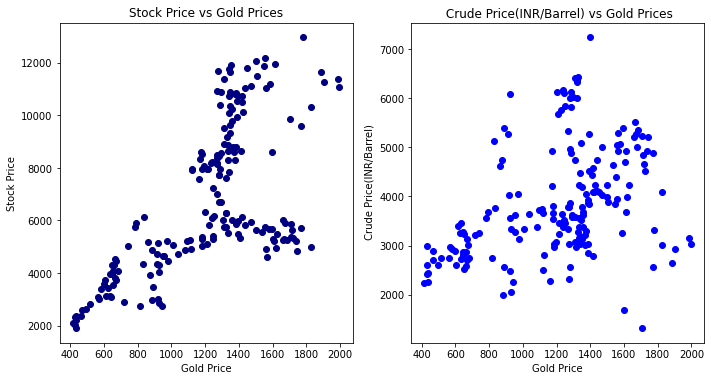

In [ ]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

def correlation(df,variables, n_rows, n_cols,str):
    fig = plt.figure(figsize=(10,10))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df[str], asset, c = next(colors))
        ax.set_xlabel(str)
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" vs Gold Prices")
    fig.tight_layout() 
    plt.show()
variables = df.columns[1:3]
#df2 = df.drop('Gold Prices(INR/troy ounce)',axis=1)
correlation(df.drop('Gold Prices(INR/troy ounce)',axis=1),variables,2,2,"Gold Price")

Gold/Troy ounce

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


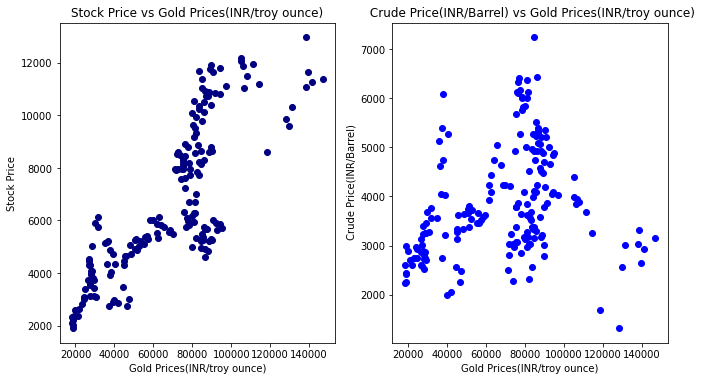

In [ ]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

def correlation(df,variables, n_rows, n_cols,str):
    fig = plt.figure(figsize=(10,10))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df[str], asset, c = next(colors))
        ax.set_xlabel(str)
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" vs Gold Prices(INR/troy ounce)")
    fig.tight_layout() 
    plt.show()
variables = df.columns[1:3]
correlation(df.drop('Gold Price',axis=1),variables,2,2,"Gold Prices(INR/troy ounce)")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


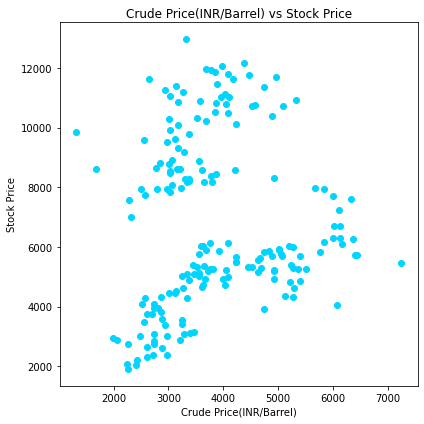

In [176]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(df[' Crude Price(INR/Barrel)'], df['Stock Price'], c = next(colors))
ax.set_xlabel('Crude Price(INR/Barrel)')
ax.set_ylabel('Stock Price')
ax.set_title("Crude Price(INR/Barrel) vs Stock Price")
fig.tight_layout() 
plt.show()

Converting data to numeric in the next section

In [ ]:
df["Gold Price"] = pd.to_numeric(df["Gold Price"], downcast="float")
df["Stock Price"] = pd.to_numeric(df["Stock Price"], downcast="float")
df[" Crude Price(INR/Barrel)"] = pd.to_numeric(df[" Crude Price(INR/Barrel)"], downcast="float")
df["Gold Prices(INR/troy ounce)"] = pd.to_numeric(df["Gold Prices(INR/troy ounce)"], downcast="float")

Using data before year 2015 for training and after 2015 for testing

In [ ]:
train = df[df.index < datetime(year=2015, month=1, day=1)]

test = df[df.index >= datetime(year=2015, month=1, day=1)]
dates = test.index

Performing linear regression on the given data

First using Y_train and Y_test to be gold

In [ ]:
lr = LinearRegression()
X_train = train[["Stock Price"," Crude Price(INR/Barrel)"]]
Y_train = train["Gold Price"]
lr.fit(X_train,Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_test = test[["Stock Price"," Crude Price(INR/Barrel)"]].values 
Y_test = test["Gold Price"].values

In [ ]:
close_predictions = lr.predict(X_test)

Finding and printing the mean absolute error

In [ ]:
mae = sum(abs(close_predictions - test["Gold Price"].values)) / test.shape[0]

In [ ]:
mae

235.66150933923856

In [ ]:
close_predictions

array([1867.9443, 1633.7035, 1629.1775, 1672.1464, 1621.9509, 1537.008 ,
       1399.188 , 1265.3038, 1176.0605, 1667.4728, 1805.4021, 1920.3141,
       1854.686 , 1818.5579, 1778.2827, 1738.6849, 1759.5121, 1840.7545,
       1813.2296, 1885.2606, 1834.6547, 1727.5336, 1706.8545, 1618.346 ,
       1673.2947, 1793.0944, 1910.51  , 1942.6202, 1877.789 , 1854.2504,
       1781.7816, 1790.8109, 1676.8643, 1699.5502, 1760.215 , 1671.7028,
       1617.1854, 1608.0975, 1528.255 , 1498.2513, 1534.6375, 1445.8695,
       1477.6973, 1449.3837, 1449.6826, 1454.7872, 1426.4857, 1390.385 ,
       1358.6838, 1372.8502, 1379.0287, 1370.5741, 1325.4415, 1355.9601,
       1345.8926, 1272.9489, 1199.9318, 1085.2058, 1143.2968, 1212.1552,
       1251.067 , 1300.7798, 1276.3599, 1311.8119, 1347.6257, 1426.8275,
       1446.1459, 1408.3326, 1341.3645, 1391.1748, 1353.5751],
      dtype=float32)

In [ ]:
Y_test

array([1780.9, 1887.2, 1902.6, 1986.5, 1995.6, 1827.5, 1770.3, 1706.3,
       1598.6, 1587. , 1614.1, 1555.2, 1500.8, 1547.7, 1506. , 1560.4,
       1470. , 1450.3, 1353.6, 1340.4, 1350.4, 1375.3, 1384. , 1347.1,
       1292.7, 1288.2, 1268.7, 1277.7, 1309.8, 1343.7, 1395. , 1419.1,
       1426. , 1419.2, 1439.4, 1391.9, 1357.3, 1347.7, 1357.6, 1388.5,
       1340.7, 1314. , 1348.5, 1347.1, 1329.8, 1334.3, 1291.8, 1234.5,
       1238.4, 1333.7, 1370.4, 1367.9, 1415.7, 1375. , 1269.3, 1341.4,
       1280.9, 1273.3, 1161.9, 1121. , 1123.9, 1195.2, 1183.6, 1216.9,
       1183.1, 1270.8, 1280.7, 1273. , 1272.2, 1309.4, 1384.6],
      dtype=float32)

Now using Y_train and Y_test to be gold/troy ounce

In [177]:
lr = LinearRegression()
X_train = train[["Stock Price"," Crude Price(INR/Barrel)"]]
Y_train = train["Gold Prices(INR/troy ounce)"]
lr.fit(X_train,Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
X_test = test[["Stock Price"," Crude Price(INR/Barrel)"]].values 
Y_test = test["Gold Prices(INR/troy ounce)"].values

In [179]:
close_predictions = lr.predict(X_test)
mae = sum(abs(close_predictions - test["Gold Prices(INR/troy ounce)"].values)) / test.shape[0]
print("The mean absolute error is:",mae)

The mean absolute error is: 11517.900493421053


In [ ]:
close_predictions

array([ 93935.92 ,  79008.95 ,  79742.234,  82766.72 ,  79650.28 ,
        75040.836,  66095.734,  54691.72 ,  51098.86 ,  82909.58 ,
        91756.8  , 100309.56 ,  95409.86 ,  93035.62 ,  90953.16 ,
        89057.875,  90449.3  ,  95043.21 ,  92487.06 ,  98689.57 ,
        95015.39 ,  88811.086,  87062.78 ,  79947.875,  84271.42 ,
        95139.86 , 102957.36 , 103431.07 ,  99180.24 ,  99088.64 ,
        93274.24 ,  93982.31 ,  86666.625,  87418.55 ,  90755.01 ,
        85102.74 ,  81615.89 ,  80593.36 ,  75767.   ,  73026.91 ,
        75475.31 ,  69966.58 ,  72215.93 ,  70845.74 ,  71230.09 ,
        72449.47 ,  71083.266,  69256.14 ,  66632.016,  66646.46 ,
        67177.29 ,  66021.55 ,  62846.86 ,  66240.7  ,  65794.64 ,
        60861.78 ,  55372.64 ,  48342.957,  51359.812,  55767.64 ,
        58887.914,  62473.727,  60858.35 ,  63611.203,  64900.64 ,
        71644.   ,  72997.53 ,  70693.06 ,  64519.336,  67337.16 ,
        64609.03 ], dtype=float32)

In [ ]:
Y_test

array([1780.9, 1887.2, 1902.6, 1986.5, 1995.6, 1827.5, 1770.3, 1706.3,
       1598.6, 1587. , 1614.1, 1555.2, 1500.8, 1547.7, 1506. , 1560.4,
       1470. , 1450.3, 1353.6, 1340.4, 1350.4, 1375.3, 1384. , 1347.1,
       1292.7, 1288.2, 1268.7, 1277.7, 1309.8, 1343.7, 1395. , 1419.1,
       1426. , 1419.2, 1439.4, 1391.9, 1357.3, 1347.7, 1357.6, 1388.5,
       1340.7, 1314. , 1348.5, 1347.1, 1329.8, 1334.3, 1291.8, 1234.5,
       1238.4, 1333.7, 1370.4, 1367.9, 1415.7, 1375. , 1269.3, 1341.4,
       1280.9, 1273.3, 1161.9, 1121. , 1123.9, 1195.2, 1183.6, 1216.9,
       1183.1, 1270.8, 1280.7, 1273. , 1272.2, 1309.4, 1384.6],
      dtype=float32)

Jumbling the dataframe so that the splitting of train and test is done accordingly

In [172]:
df = pd.read_csv("MONTHLY.csv")
df = df.dropna()
df = df.sample(frac=1).reset_index(drop=True)
df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date',inplace=True)
df = df.replace(',','', regex=True)
df["Gold Price"] = pd.to_numeric(df["Gold Price"], downcast="float")
df["Stock Price"] = pd.to_numeric(df["Stock Price"], downcast="float")
df[" Crude Price(INR/Barrel)"] = pd.to_numeric(df[" Crude Price(INR/Barrel)"], downcast="float")
df["Gold Prices(INR/troy ounce)"] = pd.to_numeric(df["Gold Prices(INR/troy ounce)"], downcast="float")

In [173]:
train = df.sample(frac=0.7)
test = df.drop(train.index).reset_index(drop=True)
train = train.reset_index(drop=True)

In [174]:
dates = test.index
lr = LinearRegression()
X_train = train[["Stock Price"," Crude Price(INR/Barrel)"]]
Y_train = train["Gold Price"]
lr.fit(X_train,Y_train) 
X_test = test[["Stock Price"," Crude Price(INR/Barrel)"]].values 
Y_test = test["Gold Price"].values
close_predictions = lr.predict(X_test)
mae = sum(abs(close_predictions - test["Gold Price"].values)) / test.shape[0]
print("The mean absolute error with gold/gram is:",mae)

lr = LinearRegression()
X_train = train[["Stock Price"," Crude Price(INR/Barrel)"]]
Y_train = train["Gold Prices(INR/troy ounce)"]
lr.fit(X_train,Y_train) 
X_test = test[["Stock Price"," Crude Price(INR/Barrel)"]].values 
Y_test = test["Gold Prices(INR/troy ounce)"].values
close_predictions = lr.predict(X_test)
mae = sum(abs(close_predictions - test["Gold Prices(INR/troy ounce)"].values)) / test.shape[0]
print("The mean absolute error with gold/ounce is:",mae)

The mean absolute error with gold/gram is: 192.37062956157484
The mean absolute error with gold/ounce is: 65199.79433936404


Predicting the prices of stock using the other two features

In [180]:
df = pd.read_csv("MONTHLY.csv")
df = df.dropna()
df = df.sample(frac=1).reset_index(drop=True)
df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date',inplace=True)
df = df.replace(',','', regex=True)
df["Gold Price"] = pd.to_numeric(df["Gold Price"], downcast="float")
df["Stock Price"] = pd.to_numeric(df["Stock Price"], downcast="float")
df[" Crude Price(INR/Barrel)"] = pd.to_numeric(df[" Crude Price(INR/Barrel)"], downcast="float")
df["Gold Prices(INR/troy ounce)"] = pd.to_numeric(df["Gold Prices(INR/troy ounce)"], downcast="float")
train = df[df.index < datetime(year=2015, month=1, day=1)]
test = df[df.index >= datetime(year=2015, month=1, day=1)]
dates = test.index
lr = LinearRegression()
X_train = train[["Gold Price"," Crude Price(INR/Barrel)"]]
Y_train = train["Stock Price"]
lr.fit(X_train,Y_train) 
X_test = test[["Gold Price"," Crude Price(INR/Barrel)"]].values 
Y_test = test["Stock Price"].values
close_predictions = lr.predict(X_test)
mae = sum(abs(close_predictions - test["Stock Price"].values)) / test.shape[0]
print("Predicting stock: The mean absolute error with gold/gram is:",mae)

lr = LinearRegression()
X_train = train[["Gold Prices(INR/troy ounce)"," Crude Price(INR/Barrel)"]]
Y_train = train["Stock Price"]
lr.fit(X_train,Y_train) 
X_test = test[["Gold Prices(INR/troy ounce)"," Crude Price(INR/Barrel)"]].values 
Y_test = test["Stock Price"].values
close_predictions = lr.predict(X_test)
mae = sum(abs(close_predictions - test["Stock Price"].values)) / test.shape[0]
print("Predicting stock: The mean absolute error with gold/ounce is:",mae)

Predicting stock: The mean absolute error with gold/gram is: 4892.948950539173
Predicting stock: The mean absolute error with gold/ounce is: 4240.459204445423


Preidicting the price of crude oil using the other two features

In [181]:
df = pd.read_csv("MONTHLY.csv")
df = df.dropna()
df = df.sample(frac=1).reset_index(drop=True)
df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date',inplace=True)
df = df.replace(',','', regex=True)
df["Gold Price"] = pd.to_numeric(df["Gold Price"], downcast="float")
df["Stock Price"] = pd.to_numeric(df["Stock Price"], downcast="float")
df[" Crude Price(INR/Barrel)"] = pd.to_numeric(df[" Crude Price(INR/Barrel)"], downcast="float")
df["Gold Prices(INR/troy ounce)"] = pd.to_numeric(df["Gold Prices(INR/troy ounce)"], downcast="float")
train = df[df.index < datetime(year=2015, month=1, day=1)]
test = df[df.index >= datetime(year=2015, month=1, day=1)]
dates = test.index
lr = LinearRegression()
X_train = train[["Gold Price"," Crude Price(INR/Barrel)"]]
Y_train = train["Stock Price"]
lr.fit(X_train,Y_train) 
X_test = test[["Gold Price","Stock Price"]].values 
Y_test = test[" Crude Price(INR/Barrel)"].values
close_predictions = lr.predict(X_test)
mae = sum(abs(close_predictions - test[" Crude Price(INR/Barrel)"].values)) / test.shape[0]
print("Predicting crude: The mean absolute error with gold/gram is:",mae)

lr = LinearRegression()
X_train = train[["Gold Prices(INR/troy ounce)"," Crude Price(INR/Barrel)"]]
Y_train = train["Stock Price"]
lr.fit(X_train,Y_train) 
X_test = test[["Gold Prices(INR/troy ounce)","Stock Price"]].values 
Y_test = test[" Crude Price(INR/Barrel)"].values
close_predictions = lr.predict(X_test)
mae = sum(abs(close_predictions - test[" Crude Price(INR/Barrel)"].values)) / test.shape[0]
print("Predicting crude: The mean absolute error with gold/ounce is:",mae)

Predicting crude: The mean absolute error with gold/gram is: 4871.106073943662
Predicting crude: The mean absolute error with gold/ounce is: 4795.497778664173


Now calculating the correlation co-efficients

In [ ]:
from numpy import cov
covariance = cov(df["Gold Price"], df["Stock Price"])

In [ ]:
from scipy.stats import pearsonr
corrGold_Stock, _ = pearsonr(df["Gold Price"], df["Stock Price"])
corrGold_Crude,_ = pearsonr(df["Gold Price"], df[" Crude Price(INR/Barrel)"])
corrCrude_Stock,_  = pearsonr(df[" Crude Price(INR/Barrel)"], df["Stock Price"])
corrGold_Gold, _ = pearsonr(df["Gold Price"], df["Gold Price"])
corrCrude_Crude,_ = pearsonr(df[" Crude Price(INR/Barrel)"], df[" Crude Price(INR/Barrel)"])
corrStock_Stock,_  = pearsonr(df["Stock Price"], df["Stock Price"])

In [ ]:
print("Pearson Correlation between gold and stock is:",corrGold_Stock)
print("Pearson Correlation between gold and crude is:",corrGold_Crude)
print("Pearson Correlation between crude and stock is:",corrCrude_Stock)
print("Pearson Correlation between gold and gold is:",corrGold_Gold)
print("Pearson Correlation between stock and stock is:",corrStock_Stock)
print("Pearson Correlation between crude and crude is:",corrCrude_Crude)

Pearson Correlation between gold and stock is: 0.6474600892793825
Pearson Correlation between gold and crude is: 0.37729575987645375
Pearson Correlation between crude and stock is: 0.08844070481533414
Pearson Correlation between gold and gold is: 1.0
Pearson Correlation between stock and stock is: 1.0
Pearson Correlation between crude and crude is: 1.0


In [ ]:
from scipy.stats import spearmanr
corrGold_Stocks, _ = spearmanr(df["Gold Price"], df["Stock Price"])
corrGold_Crudes,_ = spearmanr(df["Gold Price"], df[" Crude Price(INR/Barrel)"])
corrCrude_Stocks,_  = spearmanr(df[" Crude Price(INR/Barrel)"], df["Stock Price"])
corrGold_Golds, _ = spearmanr(df["Gold Price"], df["Gold Price"])
corrCrude_Crudes,_ = spearmanr(df[" Crude Price(INR/Barrel)"], df[" Crude Price(INR/Barrel)"])
corrStock_Stocks,_  = spearmanr(df["Stock Price"], df["Stock Price"])

In [ ]:
print("Spearman Correlation between gold and stock is:",corrGold_Stocks)
print("Spearman Correlation between gold and crude is:",corrGold_Crudes)
print("Spearman Correlation between crude and stock is:",corrCrude_Stocks)
print("Spearman Correlation between gold and gold is:",corrGold_Golds)
print("Spearman Correlation between stock and stock is:",corrStock_Stocks)
print("Spearman Correlation between crude and crude is:",corrCrude_Crudes)

Spearman Correlation between gold and stock is: 0.6458969435544034
Spearman Correlation between gold and crude is: 0.4185931800906473
Spearman Correlation between crude and stock is: 0.2239088711870706
Spearman Correlation between gold and gold is: 1.0
Spearman Correlation between stock and stock is: 1.0
Spearman Correlation between crude and crude is: 1.0


In [ ]:
#Now changing the gold price to troy ounce
corrGold_Stock, _ = pearsonr(df["Gold Prices(INR/troy ounce)"], df["Stock Price"])
corrGold_Crude,_ = pearsonr(df["Gold Prices(INR/troy ounce)"], df[" Crude Price(INR/Barrel)"])
corrCrude_Stock,_  = pearsonr(df[" Crude Price(INR/Barrel)"], df["Stock Price"])
corrGold_Gold, _ = pearsonr(df["Gold Prices(INR/troy ounce)"], df["Gold Prices(INR/troy ounce)"])
corrCrude_Crude,_ = pearsonr(df[" Crude Price(INR/Barrel)"], df[" Crude Price(INR/Barrel)"])
corrStock_Stock,_  = pearsonr(df["Stock Price"], df["Stock Price"])
print("Pearson Correlation between gold and stock is:",corrGold_Stock)
print("Pearson Correlation between gold and crude is:",corrGold_Crude)
print("Pearson Correlation between crude and stock is:",corrCrude_Stock)
print("Pearson Correlation between gold and gold is:",corrGold_Gold)
print("Pearson Correlation between stock and stock is:",corrStock_Stock)
print("Pearson Correlation between crude and crude is:",corrCrude_Crude)

Pearson Correlation between gold and stock is: 0.8080782292286126
Pearson Correlation between gold and crude is: 0.255047146945988
Pearson Correlation between crude and stock is: 0.08844070481533414
Pearson Correlation between gold and gold is: 1.0
Pearson Correlation between stock and stock is: 1.0
Pearson Correlation between crude and crude is: 1.0


In [ ]:
corrGold_Stocks, _ = spearmanr(df["Gold Prices(INR/troy ounce)"], df["Stock Price"])
corrGold_Crudes,_ = spearmanr(df["Gold Prices(INR/troy ounce)"], df[" Crude Price(INR/Barrel)"])
corrCrude_Stocks,_  = spearmanr(df[" Crude Price(INR/Barrel)"], df["Stock Price"])
corrGold_Golds, _ = spearmanr(df["Gold Prices(INR/troy ounce)"], df["Gold Prices(INR/troy ounce)"])
corrCrude_Crudes,_ = spearmanr(df[" Crude Price(INR/Barrel)"], df[" Crude Price(INR/Barrel)"])
corrStock_Stocks,_  = spearmanr(df["Stock Price"], df["Stock Price"])
print("Spearman Correlation between gold and stock is:",corrGold_Stocks)
print("Spearman Correlation between gold and crude is:",corrGold_Crudes)
print("Spearman Correlation between crude and stock is:",corrCrude_Stocks)
print("Spearman Correlation between gold and gold is:",corrGold_Golds)
print("Spearman Correlation between stock and stock is:",corrStock_Stocks)
print("Spearman Correlation between crude and crude is:",corrCrude_Crudes)

Spearman Correlation between gold and stock is: 0.8024404984091436
Spearman Correlation between gold and crude is: 0.35533003044583167
Spearman Correlation between crude and stock is: 0.2239088711870706
Spearman Correlation between gold and gold is: 1.0
Spearman Correlation between stock and stock is: 1.0
Spearman Correlation between crude and crude is: 1.0
